In [7]:
import math
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from sqlalchemy import create_engine


In [9]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'windsor_home_prices'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

home_prices = pd.read_sql_table('windsor_home_prices', con=engine)

In [10]:
home_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
price       546 non-null float64
lotsize     546 non-null int64
bedrooms    546 non-null int64
bathrms     546 non-null int64
stories     546 non-null int64
driveway    546 non-null object
recroom     546 non-null object
fullbase    546 non-null object
gashw       546 non-null object
airco       546 non-null object
garagepl    546 non-null int64
prefarea    546 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [11]:
home_prices.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,66000.0,3880,3,2,2,yes,no,yes,no,no,2,no
2,83800.0,4800,3,1,1,yes,yes,yes,no,no,0,no
3,45000.0,3986,2,2,1,no,yes,yes,no,no,1,no
4,65900.0,4510,4,2,2,yes,no,yes,no,no,0,no


In [ ]:
We will test whether there is a significant difference in price for records where fullbase is yes versus no. 
Per the documentation, this variable indicates whether the home has a full, finished basement.

Lets split our data into two DataFrames for ease of analysis.

In [12]:
# Split up our dataset
basement_yes = home_prices[(home_prices['fullbase'] == "yes")]
basement_yes.info()

basement_no = home_prices[(home_prices['fullbase'] == "no")]
basement_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191 entries, 0 to 438
Data columns (total 12 columns):
price       191 non-null float64
lotsize     191 non-null int64
bedrooms    191 non-null int64
bathrms     191 non-null int64
stories     191 non-null int64
driveway    191 non-null object
recroom     191 non-null object
fullbase    191 non-null object
gashw       191 non-null object
airco       191 non-null object
garagepl    191 non-null int64
prefarea    191 non-null object
dtypes: float64(1), int64(5), object(6)
memory usage: 19.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 125 to 545
Data columns (total 12 columns):
price       355 non-null float64
lotsize     355 non-null int64
bedrooms    355 non-null int64
bathrms     355 non-null int64
stories     355 non-null int64
driveway    355 non-null object
recroom     355 non-null object
fullbase    355 non-null object
gashw       355 non-null object
airco       355 non-null object
garagepl    355 non-null int

In [17]:
len(basement_yes)

191

In [18]:
len(basement_no)

355

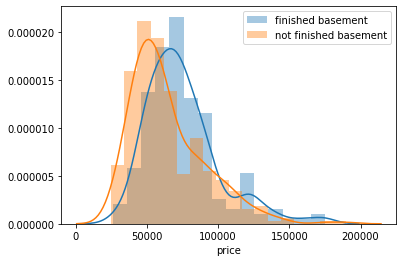

In [25]:
# Lets get the sense of how these figures look.
import matplotlib.pylab as plt
sns.distplot(basement_yes['price'], label='finished basement')
sns.distplot(basement_no['price'], label='not finished basement')
plt.legend()
plt.show()

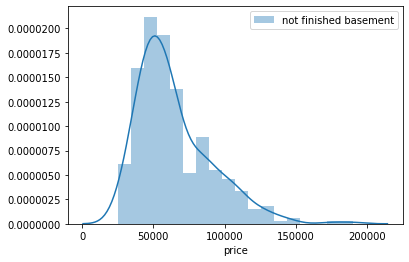

In [26]:
sns.distplot(basement_no['price'], label='not finished basement')
plt.legend()
plt.show()

In [ ]:
It appears that these are normally distributed. 
We can examine the descriptive statistics as well to learn more about the distributions.

In [14]:
print(stats.describe(basement_yes['price']))
print(stats.describe(basement_no['price']))

DescribeResult(nobs=191, minmax=(26000.0, 175000.0), mean=74894.50261780104, variance=687483535.4092036, skewness=1.299439350765169, kurtosis=2.200944427832982)
DescribeResult(nobs=355, minmax=(25000.0, 190000.0), mean=64477.58309859155, variance=690693014.1816344, skewness=1.2539001276811907, kurtosis=1.9898502593432044)


In [ ]:
Hypothesis testing
To state our hypotheses formally:
Ho: There is no difference in the average sale price between homes with and without a full basement.
Ha: There is a difference in the average sale price between homes with and without a full basement.

In [15]:
stats.ttest_ind(basement_yes['price'],basement_no['price'])

Ttest_indResult(statistic=4.420628512286621, pvalue=1.1885626562866786e-05)

In [16]:
stats.ttest_ind(basement_yes['price'],basement_no['price'], equal_var = False)

Ttest_indResult(statistic=4.423727459458271, pvalue=1.260367595981112e-05)

In [29]:
basement_no.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
125,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
126,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
127,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
128,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
129,69000.0,4160,3,1,3,yes,no,no,no,no,0,no


In [30]:
basement_no['price'].min()

25000.0

In [31]:
basement_no['price'].max()

190000.0

In [32]:
len(basement_no[basement_no['price']>150000])

2

In [34]:
len(basement_no[basement_no['price']>100000])

41

In [35]:
len(basement_no[basement_no['price']>140000])

4

In [38]:
len(basement_yes[basement_yes['price']>150000])

4

In [42]:
len(basement_yes[basement_yes['price']>140000])

5

In [ ]:
sns.distplot(basement_no['price'], label='not finished basement')
plt.legend()
plt.show()

In [39]:
basement_no = basement_no[basement_no.price <140000]

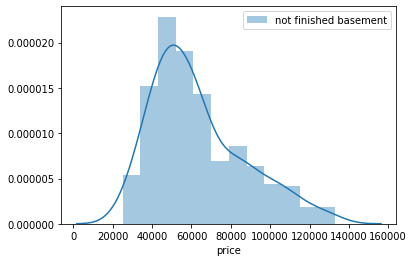

In [40]:
sns.distplot(basement_no['price'], label='not finished basement')
plt.legend()
plt.show()

In [41]:
stats.ttest_ind(basement_yes['price'],basement_no['price'])

Ttest_indResult(statistic=5.30378274908784, pvalue=1.658314752645684e-07)

In [43]:
basement_yes = basement_yes[basement_yes.price <140000]

In [44]:
not necessary
stats.ttest_ind(basement_yes['price'],basement_no['price'])

Ttest_indResult(statistic=4.324081948541656, pvalue=1.8285495884007954e-05)

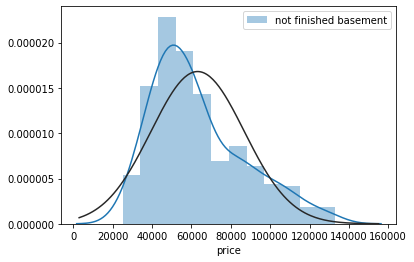

In [46]:
from scipy.stats import norm, skew
sns.distplot(basement_no['price'], label='not finished basement', fit=norm)
plt.legend()
plt.show()

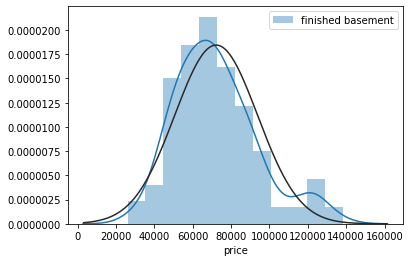

In [47]:
sns.distplot(basement_yes['price'], label='finished basement', fit=norm)
plt.legend()
plt.show()

In [ ]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column


In [48]:
import numpy as np
basement_yes['price'] = np.log1p(basement_yes['price'])

In [51]:
basement_no['price'] = np.log1p(basement_no['price'])

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
basement_no['price'].isna().sum()

0

In [73]:
basement_no['price'].dropna(inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/series.py:4784: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(result)


In [78]:
basement_no['price']

125      2.0
126      2.0
127      2.0
128      2.0
129      2.0
        ... 
542      2.0
543      2.0
544      2.0
545      2.0
price    NaN
Name: price, Length: 351, dtype: float64

In [67]:
basement_yes['price'] = basement_yes['price'].astype(int)

In [79]:
basement_no['price'] = basement_no['price'].astype(int)

ValueError: Cannot convert non-finite values (NA or inf) to integer

In [77]:
stats.ttest_ind(basement_yes['price'],basement_no['price'])

Ttest_indResult(statistic=nan, pvalue=nan)

In [ ]:
How do we interpret these results?

In [ ]:
What can we infer about the populations?